# Sentiment Analysis

## Import libraries

In [1]:
## Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Tesxt preporcessing
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer, TweetTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stop_words = stopwords.words('english')
nltk.download('wordnet')
stop_words.append("n't")
import spacy
nlp = spacy.load('en_core_web_lg')

## Transform text into vectors                             
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Train and Test Split
from sklearn.model_selection import train_test_split
                             
## Upsample imbalanced datase
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, SMOTENC,BorderlineSMOTE,SVMSMOTE ,ADASYN,KMeansSMOTE

## Build Models
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, Pool
from sklearn.tree import DecisionTreeClassifier                             
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier                             
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.svm import LinearSVC
                             
## Test model
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SwartP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SwartP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Import data

In [2]:
data=pd.read_csv(r'C:\Users\SwartP\OneDrive - Platinum Life (Proprietary) Limited\Documents\Data Science\Explore Data Science\Sprint 6-Classification\Predict\climate-change-edsa2020-21\train.csv')

In [3]:
data.describe(include='all')

,sentiment,message,tweetid
count,15819.000000,15819,15819.000000
unique,NaN,14229,NaN
top,NaN,RT @StephenSchlegel: she's thinking about how ...,NaN
freq,NaN,307,NaN
mean,0.917504,NaN,501719.433656
std,0.836537,NaN,289045.983132
min,-1.000000,NaN,6.000000
25%,1.000000,NaN,253207.500000
50%,1.000000,NaN,502291.000000
75%,1.000000,NaN,753769.000000


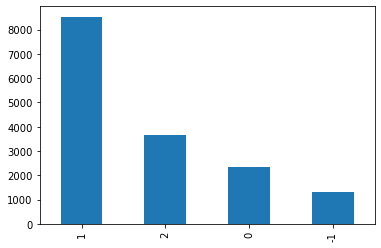

In [4]:
data['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

## Text Preporcessing

In [5]:
sorted(stop_words)

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 "n't",
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'o

In [6]:
def format_words(inputtext):
    formatted=inputtext.encode('ascii', 'ignore').decode()
    #formatted=re.sub(r'\B#\w*[a-zA-Z]+\w*','', formatted) # Remove hastags
    #formatted=re.sub(r'\B@\w*[a-zA-Z]+\w*','', formatted) # remove mentions
    #formatted=re.sub(r'\w*\d+\w*', '', formatted) # remove numbers
    formatted=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', 'web_url', formatted) # remove links
    tknzr = TweetTokenizer()
    formatted=tknzr.tokenize(formatted)
    formatted=[x.lower() for x in formatted]
    formatted=[word for word in formatted if word not in stop_words]
    #formatted=[word for word in formatted if word!='rt']
    lemmatizer = WordNetLemmatizer()
    formatted=[lemmatizer.lemmatize(x) for x in formatted]
    formatted=' '.join([x for x in formatted])
    formatted=''.join(x for x in formatted if x not in string.punctuation)
    formatted=re.sub(' +',' ',formatted).strip()
    return formatted

In [7]:
data['format_message']=data['message'].apply(lambda x:format_words(x))

In [8]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
    else:
        print('No named entities found.')

In [9]:
def add_pos(inputtext):
    final=[]
    formatted=inputtext.encode('ascii', 'ignore').decode()
    formatted=re.sub(r'\w*\d+\w*', '', formatted) # remove numbers
    formatted=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', 'web_url', formatted)
    doc=nlp(formatted)
    for item in doc:
        if item.pos_ not in ['PRON','PUNCT']:
            final.append((item.lemma_ +' ' + item.tag_) )
    if doc.ents:
        for ent in doc.ents:
            final.append(ent.label_)
    returnstring=' '.join([x.lower() for x in final])
    return returnstring
        

In [10]:
data['spacy_message']= data['message'].apply(lambda x:add_pos(x))

In [11]:
data['spacy_message'][0]

'polyscimajor nnp epa nnp chief nn do vbz not rb think vb carbon nn dioxide nn be vbz main jj cause nn of in global jj warming nn and cc wait vb web_url uh via in @mashable nnp org org'

## Vectorize

In [12]:
vect=TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1,4), min_df=3, max_df=0.85)
#vect=CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1,2), min_df=2)

In [13]:
X_count = vect.fit_transform(data['spacy_message'])

In [14]:
X_count.shape

(15819, 56707)

In [15]:
list(vect.get_feature_names())

['_makada',
 '_makada add',
 '_makada add nn',
 '_sp',
 '_sp _sp',
 '_sp _sp vbp',
 '_sp _sp vbp sue',
 '_sp accept',
 '_sp accept vb',
 '_sp accept vb univer',
 '_sp add',
 '_sp agency',
 '_sp agency nns',
 '_sp america',
 '_sp animal',
 '_sp australia',
 '_sp australia nnp',
 '_sp bad',
 '_sp bad jj',
 '_sp battle',
 '_sp bbc',
 '_sp bbc nnp',
 '_sp big',
 '_sp big jj',
 '_sp big jjs',
 '_sp billion',
 '_sp billion cd',
 '_sp billion cd dollar',
 '_sp c_m_dangelo',
 '_sp c_m_dangelo xx',
 '_sp c_m_dangelo xx web_url',
 '_sp cardinal',
 '_sp cause',
 '_sp cause vbz',
 '_sp cause vbz global',
 '_sp cc',
 '_sp cc _sp',
 '_sp cc amp',
 '_sp cc amp nnp',
 '_sp cc climate',
 '_sp cc climate nn',
 '_sp cc contradict',
 '_sp cc contradict vbz',
 '_sp cc dt',
 '_sp cc dt chart',
 '_sp cc global',
 '_sp cc global jj',
 '_sp cc gt',
 '_sp cc md',
 '_sp cc people',
 '_sp cc people nns',
 '_sp cc pron',
 '_sp cc pron prp',
 '_sp cc rb',
 '_sp cc slow',
 '_sp cc slow jj',
 '_sp cc vbp',
 '_sp cc v

In [16]:
X = X_count.toarray()

In [17]:
y=np.array(data['sentiment'])

## Sort out imbalance

In [18]:
sm = SMOTE(random_state=9)
x_res, y__res = sm.fit_resample(X, y)


## Split into train and test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_res, y__res, test_size=0.001, random_state=9,shuffle=True)
x_train_res, y_train_res =X_train, y_train

In [20]:
import collections

In [21]:
collections.Counter(y_train_res)

Counter({1: 8523, 2: 8518, 0: 8518, -1: 8526})

# Build Model

## Logistic regression

In [ ]:
logreg=LogisticRegression(C=0.99, solver='liblinear', verbose=1, multi_class='ovr')

In [ ]:
logreg.fit(x_train_res, y_train_res)

In [ ]:
y_pred_logreg = logreg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_logreg))

## GaussianNB

In [ ]:
#naive_bayes = GaussianNB()

In [ ]:
#naive_bayes.fit(x_train_res, y_train_res)

In [ ]:
#naive_bayes.fit(x_train_res, y_train_res)

In [ ]:
#y_pred_nb = naive_bayes.predict(X_test)

In [ ]:
#print(classification_report(y_test, y_pred_nb))

## MultinomialNB

In [ ]:
MNB=MultinomialNB()

In [ ]:
MNB.fit(x_train_res, y_train_res)

In [ ]:
MNB.fit(x_train_res, y_train_res)

In [ ]:
y_pred_MNB = MNB.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_MNB))

## KNN

In [ ]:
#n_neighbors = 3

In [ ]:
#knn = KNeighborsClassifier(n_neighbors)

In [ ]:
#knn.fit(x_train_res, y_train_res)

In [ ]:
#y_pred_knn = knn.predict(X_test)

In [ ]:
#print(classification_report(y_test, y_pred_knn))

## Support Vector Classification

In [ ]:
svc_mod=SVC(kernel='rbf')

In [ ]:
svc_mod.fit(x_train_res, y_train_res)
y_pred_svc = svc_mod.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svc))

## Decision Tree

In [ ]:
#tree = DecisionTreeClassifier(random_state=42)

In [ ]:
#tree.fit(x_train_res, y_train_res)

In [ ]:
#y_pred_tree = tree.predict(X_test)

In [ ]:
#print(classification_report(y_test, y_pred_tree))

## RandomForestClassifier

In [ ]:
#forest = RandomForestClassifier(n_estimators=10000, random_state=42)
#forest.fit(x_train_res, y_train_res)

In [ ]:
#y_pred_forest = forest.predict(X_test)

In [ ]:
#print(classification_report(y_test, y_pred_forest))

## AdaBoostClassifier

In [ ]:
#ada=AdaBoostClassifier( n_estimators=10000, random_state=42)

In [ ]:
#ada.fit(x_train_res, y_train_res)

In [ ]:
#y_pred_ada = ada.predict(X_test)

In [ ]:
#print(classification_report(y_test, y_pred_ada))

## XGBoost

In [ ]:
#XG=XGBClassifier()

In [ ]:
#XG.fit(x_train_res, y_train_res)

In [ ]:
#y_pred_XG = ada.predict(X_test)

In [ ]:
#print(classification_report(y_test, y_pred_XG))

## Catboost

In [ ]:
#catboost_mod = CatBoostClassifier(iterations=4000,learning_rate=1, random_state=9, eval_metric='TotalF1')

In [ ]:
#catboost_mod.fit(x_train_res, y_train_res)

In [ ]:
#y_pred_catboost = catboost_mod.predict(X_test)

In [ ]:
#print(classification_report(y_test, y_pred_catboost))

## Linear SVC

In [22]:
lsvc = LinearSVC(penalty='l2',max_iter=100000)
lsvc.fit(x_train_res, y_train_res)
lsvc_pred = lsvc.predict(X_test)

In [23]:
print(classification_report(y_test, lsvc_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         4
           0       0.92      1.00      0.96        12
           1       1.00      0.71      0.83         7
           2       0.92      1.00      0.96        12

    accuracy                           0.94        35
   macro avg       0.96      0.93      0.94        35
weighted avg       0.95      0.94      0.94        35



## Import test set-catboost

In [24]:
#test_data=pd.read_csv(r'C:\Users\SwartP\OneDrive - Platinum Life (Proprietary) Limited\Documents\Data Science\Explore Data Science\Sprint 6-Classification\Predict\climate-change-edsa2020-21\test.csv')

In [ ]:
#test_data['format_message']=test_data['message'].apply(lambda x:add_pos(x))

In [ ]:
#x_vect=vect.transform(test_data['format_message'])

In [ ]:
#X_new = x_vect.toarray()

In [ ]:
#y_pred_fin = catboost_mod.predict(X_new)

In [ ]:
#test_data['sentiment']=y_pred_fin

In [ ]:
#test_data[['tweetid','sentiment']].to_csv('submission_1_5_catboost_nrange2_pos.csv', index=False)

## Import test set-logreg

In [ ]:
#test_data=pd.read_csv(r'C:\Users\SwartP\OneDrive - Platinum Life (Proprietary) Limited\Documents\Data Science\Explore Data Science\Sprint 6-Classification\Predict\climate-change-edsa2020-21\test.csv')

In [ ]:
#test_data['format_message']=test_data['message'].apply(lambda x:add_pos(x))

In [ ]:
#x_vect=vect.transform(test_data['format_message'])

In [ ]:
#X_new = x_vect.toarray()

In [ ]:
#y_pred_fin = logreg.predict(X_new)

In [ ]:
#test_data['sentiment']=y_pred_fin

In [ ]:
#test_data[['tweetid','sentiment']].to_csv('submission_1_1_logreg_nrange2.csv', index=False)

## Import test set-lsvc

In [25]:
test_data=pd.read_csv(r'C:\Users\SwartP\OneDrive - Platinum Life (Proprietary) Limited\Documents\Data Science\Explore Data Science\Sprint 6-Classification\Predict\climate-change-edsa2020-21\test.csv')

In [26]:
test_data['format_message']=test_data['message'].apply(lambda x:add_pos(x))

In [27]:
x_vect=vect.transform(test_data['format_message'])

In [28]:
X_new = x_vect.toarray()

In [29]:
y_pred_fin = lsvc.predict(X_new)

In [30]:
test_data['sentiment']=y_pred_fin

In [31]:
test_data[['tweetid','sentiment']].to_csv('submission_1_7_lsvc_nrange4_posmindf3.csv', index=False)

## Import test set-svc

In [ ]:
#test_data=pd.read_csv(r'C:\Users\SwartP\OneDrive - Platinum Life (Proprietary) Limited\Documents\Data Science\Explore Data Science\Sprint 6-Classification\Predict\climate-change-edsa2020-21\test.csv')

In [ ]:
#test_data['format_message']=test_data['message'].apply(lambda x:add_pos(x))

In [ ]:
#x_vect=vect.transform(test_data['format_message'])

In [ ]:
#X_new = x_vect.toarray()

In [ ]:
#y_pred_fin = svc_mod.predict(X_new)

In [ ]:
#test_data['sentiment']=y_pred_fin

In [ ]:
#test_data[['tweetid','sentiment']].to_csv('submission_1_7_svc_mod_nrange4_pos_rbf.csv', index=False)